In [3]:
# !pip install neurokit2
import neurokit2 as nk

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# anita_max_tkr = pd.read_csv('anita_max_tkr.csv', sep=';')
# nasah_max_tkr2 = pd.read_csv('nasah_max_tkr2.csv', sep=';')
# nyu_max_tkr = pd.read_csv('nyu_max_tkr.csv', sep=';')
# nasah_max_tkr2
alikha_pulse_tkr = pd.read_csv("alikha_pulse_tkr.csv",sep =";")
anita_pulse_tkr = pd.read_csv("anita_pulse_tkr.csv",sep =";")
ecak_pulse_tkr = pd.read_csv("ecak_pulse_tkr.csv",sep =";")
nasah_pulse_tkr = pd.read_csv("nasah_pulse_tkr.csv",sep =";")
nyoman_pulse_tkr = pd.read_csv("nyoman_pulse_tkr.csv",sep =";")
nyu_pulse_tkr = pd.read_csv("nyu_pulse_tkr.csv",sep =";")
puci_pulse_tkr = pd.read_csv("puci_pulse_tkr.csv",sep =";")
roshied_pulse_tkr = pd.read_csv("roshied_pulse_tkr.csv",sep =";")
widi_pulse_tkr = pd.read_csv("widi_pulse_tkr.csv",sep =";")
aldi_tkr = pd.read_csv("../29-9-23/aldi_tkr.csv",skiprows=13,sep =",")
ary_tkr = pd.read_csv("../29-9-23/ary_tkr.csv",skiprows=13,sep =",")
betari_tkr = pd.read_csv("../29-9-23/betari_tkr.csv",skiprows=13,sep =",")
charisma_tkr = pd.read_csv("../29-9-23/charisma_tkr.csv",skiprows=13,sep =",")
deva_tkr = pd.read_csv("../29-9-23/deva_tkr.csv",skiprows=13,sep =",")
faiza_tkr = pd.read_csv("../29-9-23/faiza_tkr.csv",skiprows=13,sep =",")
novi_tkr = pd.read_csv("../29-9-23/novi_tkr.csv",skiprows=13,sep =",")

<Axes: >

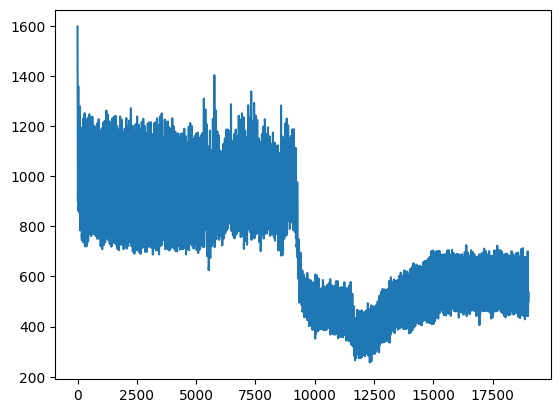

In [21]:
puci_pulse_tkr['1710'].plot()
# puci_pulse_tkr

In [7]:
# nasah_pulse_tkr.columns = ['ir','millis','detik']
# nasah_pulse_tkr = nasah_pulse_tkr[0:1000]
# nasah_pulse_tkr.to_json('nasah_pulse_tkr.json')

In [8]:
def preprocessPulse(path):
  path.columns = ["ir","millis","waktu"]
  path = path[(path.waktu >10)]
  path = path[(path.waktu <=70)]

  return path

In [7]:
alikha_pulse_tkr = preprocessPulse(alikha_pulse_tkr)
anita_pulse_tkr = preprocessPulse(anita_pulse_tkr)
ecak_pulse_tkr = preprocessPulse(ecak_pulse_tkr)
nasah_pulse_tkr = preprocessPulse(nasah_pulse_tkr)
nyoman_pulse_tkr = preprocessPulse(nyoman_pulse_tkr)
nyu_pulse_tkr = preprocessPulse(nyu_pulse_tkr)
puci_pulse_tkr = preprocessPulse(puci_pulse_tkr)
roshied_pulse_tkr = preprocessPulse(roshied_pulse_tkr)
widi_pulse_tkr = preprocessPulse(widi_pulse_tkr)
# anita_max_tkr = preprocessMax(anita_max_tkr)
# nasah_max_tkr2 = preprocessMax(nasah_max_tkr2)
# nyu_max_tkr = preprocessMax(nyu_max_tkr)


In [79]:
# nasah_pulse_tkr = nasah_pulse_tkr[(nasah_pulse_tkr.waktu <= 30)]
# nasah_pulse_tkr.to_json('nasah_pulse_tkr.json')

In [80]:
# visky.plot(figsize = (50,10))
# elya

In [81]:
# fauzi[3000:4000].plot(figsize = (5,5))

<Axes: >

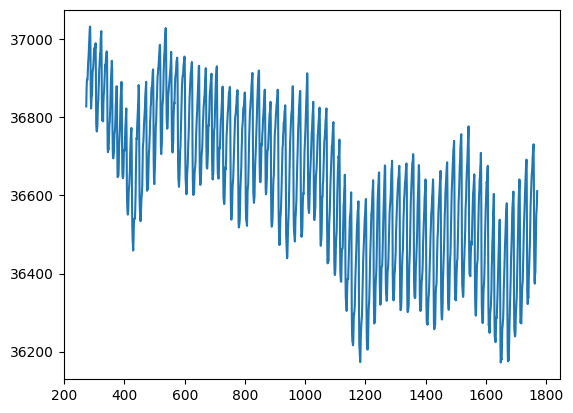

In [82]:
anita_max_tkr['r'].plot()

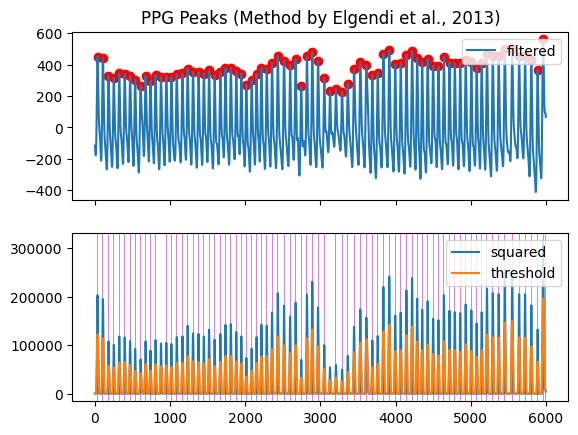

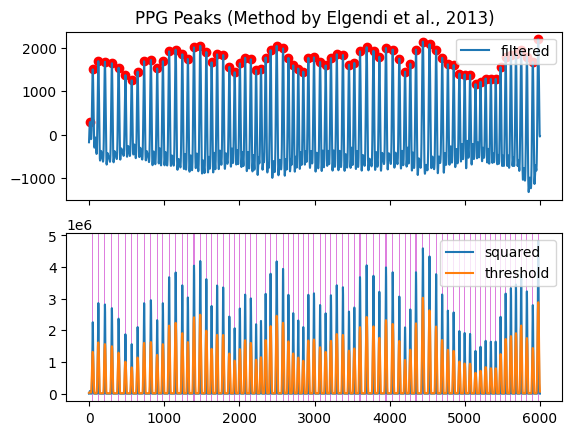

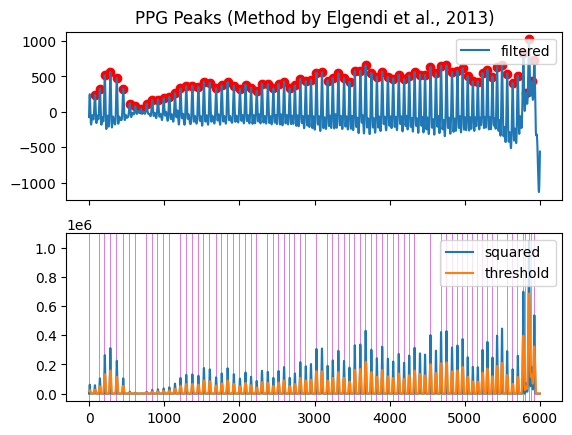

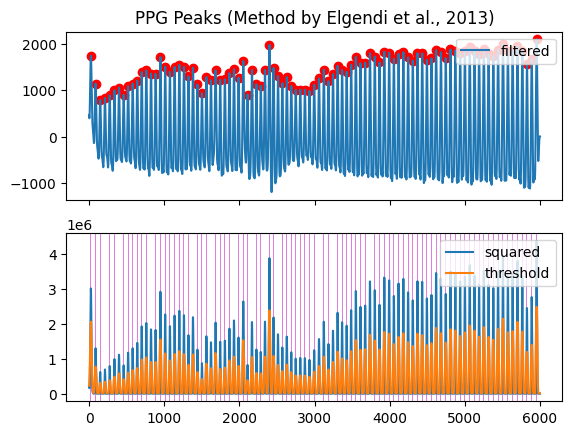

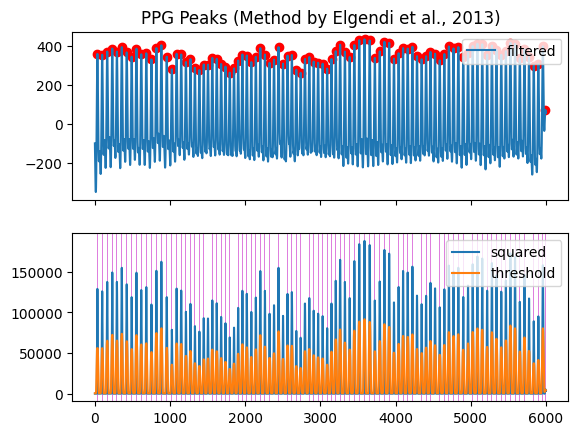

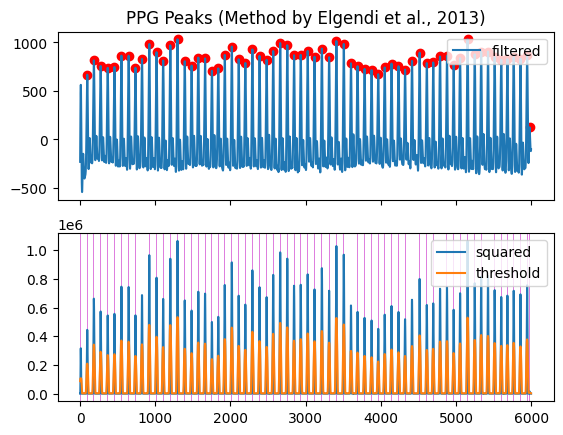

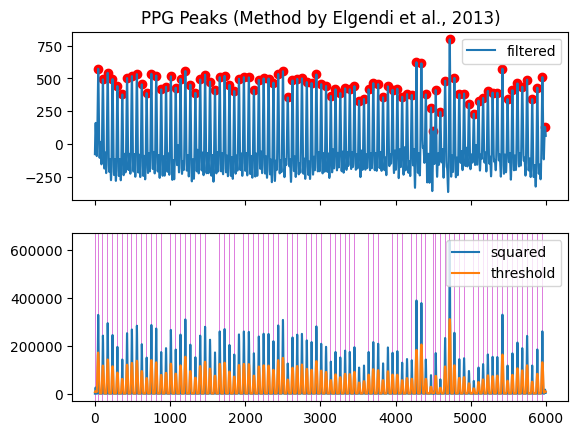

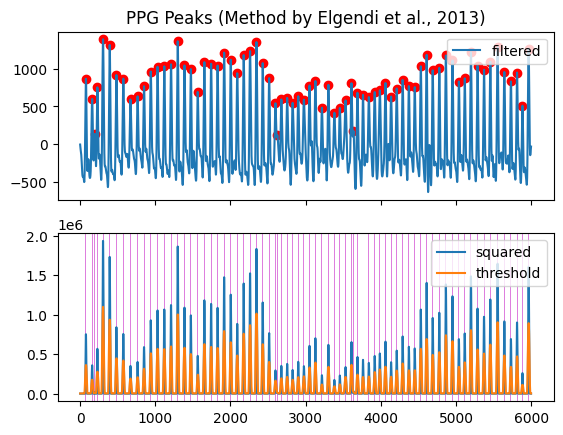

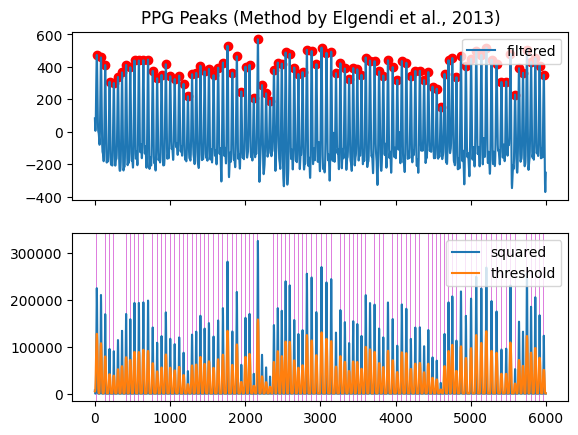

In [106]:
def cleanPeak(path):
    ppg_path = nk.ppg_clean(path[['ir']], sampling_rate=250)
    peaks_path = nk.ppg_findpeaks(ppg_path, sampling_rate=35, show=True)
    return peaks_path

def cleanPeakMax(path):
    ppg_path = nk.ppg_clean(path[['ir']], sampling_rate=100)
    peaks_path = nk.ppg_findpeaks(ppg_path, sampling_rate=35, show=False)
    return peaks_path

peaks_alikha_pulse_tkr = cleanPeak(alikha_pulse_tkr)
peaks_anita_pulse_tkr = cleanPeak(anita_pulse_tkr)
peaks_ecak_pulse_tkr = cleanPeak(ecak_pulse_tkr)
peaks_nasah_pulse_tkr = cleanPeak(nasah_pulse_tkr)
peaks_nyoman_pulse_tkr = cleanPeak(nyoman_pulse_tkr)
peaks_nyu_pulse_tkr = cleanPeak(nyu_pulse_tkr)
peaks_puci_pulse_tkr = cleanPeak(puci_pulse_tkr)
peaks_roshied_pulse_tkr = cleanPeak(roshied_pulse_tkr)
peaks_widi_pulse_tkr = cleanPeak(widi_pulse_tkr)

peaks_anita_max_tkr = cleanPeakMax(anita_max_tkr)
peaks_nasah_max_tkr2 = cleanPeakMax(nasah_max_tkr2)
peaks_nyu_max_tkr = cleanPeakMax(nyu_max_tkr)

<Axes: xlabel='PPG_Peaks', ylabel='PPG_Peaks'>

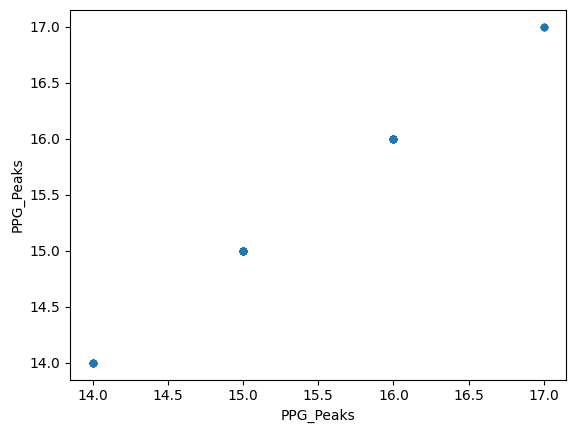

In [107]:
peaks_nasah_max_tkr2 = pd.DataFrame(peaks_nasah_max_tkr2)
peaks_nasah_max_tkr2_diff = peaks_nasah_max_tkr2.diff()
# peaks_nasah_max_tkr2_diff[1:]
# len(peaks_nasah_max_tkr2_diff)
# angka = np.arange(1,len(peaks_nasah_max_tkr2_diff),1)
# len(angka)
peaks_nasah_max_tkr2_diff.plot(kind = 'scatter', x = 'PPG_Peaks', y = 'PPG_Peaks'  )

# plt.plot(peaks_nasah_max_tkr2.diff())

In [108]:
def feature(peak):
  peak = pd.DataFrame(peak)
  hr = peak.count()/(1)
  hrv = peak.diff().var()
  std = peak.diff().std()

  return hr,hrv,std

In [109]:
hr_alikha_pulse_tkr,hrv_alikha_pulse_tkr,std_alikha_pulse_tkr = feature(peaks_alikha_pulse_tkr)
hr_anita_pulse_tkr,hrv_anita_pulse_tkr,std_anita_pulse_tkr = feature(peaks_anita_pulse_tkr)
hr_ecak_pulse_tkr,hrv_ecak_pulse_tkr,std_ecak_pulse_tkr = feature(peaks_ecak_pulse_tkr)
hr_nasah_pulse_tkr,hrv_nasah_pulse_tkr,std_nasah_pulse_tkr = feature(peaks_nasah_pulse_tkr)
hr_nyoman_pulse_tkr,hrv_nyoman_pulse_tkr,std_nyoman_pulse_tkr = feature(peaks_nyoman_pulse_tkr)
hr_nyu_pulse_tkr,hrv_nyu_pulse_tkr,std_nyu_pulse_tkr = feature(peaks_nyu_pulse_tkr)
hr_puci_pulse_tkr,hrv_puci_pulse_tkr,std_puci_pulse_tkr = feature(peaks_puci_pulse_tkr)
hr_roshied_pulse_tkr,hrv_roshied_pulse_tkr,std_roshied_pulse_tkr = feature(peaks_roshied_pulse_tkr)
hr_widi_pulse_tkr,hrv_widi_pulse_tkr,std_widi_pulse_tkr = feature(peaks_widi_pulse_tkr)
hr_anita_max_tkr,hrv_anita_max_tkr,std_anita_max_tkr = feature(peaks_anita_max_tkr)
hr_nasah_max_tkr2,hrv_nasah_max_tkr2,std_nasah_max_tkr2 = feature(peaks_nasah_max_tkr2)
hr_nyu_max_tkr,hrv_nyu_max_tkr,std_nyu_max_tkr = feature(peaks_nyu_max_tkr)

# hr_alikha_pulse_tkr


In [ ]:
data = {
'Nama' : [
"alikha_pulse_tkr",
"anita_pulse_tkr",
"ecak_pulse_tkr",
"nasah_pulse_tkr",
"nyoman_pulse_tkr",
"nyu_pulse_tkr",
"puci_pulse_tkr",
"roshied_pulse_tkr",
"widi_pulse_tkr",
"anita_max_tkr",
"nasah_max_tkr2",
"nyu_max_tkr",
],
'HR' : [
int(hr_alikha_pulse_tkr),
int(hr_anita_pulse_tkr),
int(hr_ecak_pulse_tkr),
int(hr_nasah_pulse_tkr),
int(hr_nyoman_pulse_tkr),
int(hr_nyu_pulse_tkr),
int(hr_puci_pulse_tkr),
int(hr_roshied_pulse_tkr),
int(hr_widi_pulse_tkr),
int(hr_anita_max_tkr),
int(hr_nasah_max_tkr2),
int(hr_nyu_max_tkr),
],
'HRV' : [
int(hrv_alikha_pulse_tkr),
int(hrv_anita_pulse_tkr),
int(hrv_ecak_pulse_tkr),
int(hrv_nasah_pulse_tkr),
int(hrv_nyoman_pulse_tkr),
int(hrv_nyu_pulse_tkr),
int(hrv_puci_pulse_tkr),
int(hrv_roshied_pulse_tkr),
int(hrv_widi_pulse_tkr),
int(hrv_anita_max_tkr),
int(hrv_nasah_max_tkr2),
int(hrv_nyu_max_tkr),
],
'STD' : [
int(std_alikha_pulse_tkr),
int(std_anita_pulse_tkr),
int(std_ecak_pulse_tkr),
int(std_nasah_pulse_tkr),
int(std_nyoman_pulse_tkr),
int(std_nyu_pulse_tkr),
int(std_puci_pulse_tkr),
int(std_roshied_pulse_tkr),
int(std_widi_pulse_tkr),
int(std_anita_max_tkr),
int(std_nasah_max_tkr2),
int(std_nyu_max_tkr),
]}

In [123]:
data = pd.DataFrame(data)
data.to_excel('dass.xlsx')